In [63]:
using JLD, Plots, LaTeXStrings, Measurements

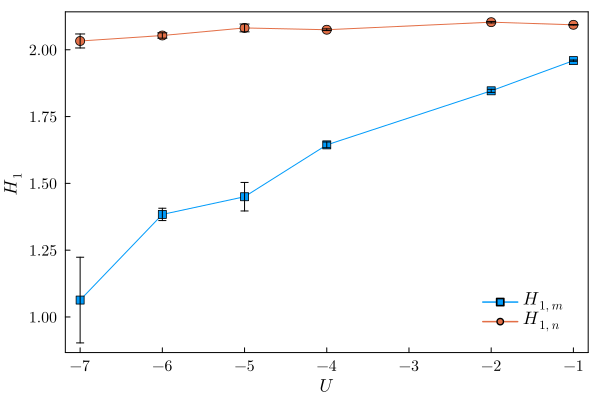

In [64]:
data = load("../../data/07_14_2023/H_GS_N64_Lx8_Ly8_LA16_beta18.0.jld")

plot(
    data["U"], data["Hm_avg"], yerror=data["Hm_err"],
    marker=(4, :square),
    xlabel=L"U", ylabel=L"H_{1}",
    label=L"H_{1, m}",
    fontfamily="Computer Modern",
    legendfontsize = 12,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    data["U"], data["Hn_avg"], yerror=data["Hn_err"],
    marker=(5, :circle),
    label=L"H_{1, n}"
)

In [65]:
savefig("Shannon_ent_1.svg")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\plots\\07_14_2023\\Shannon_ent_1.svg"

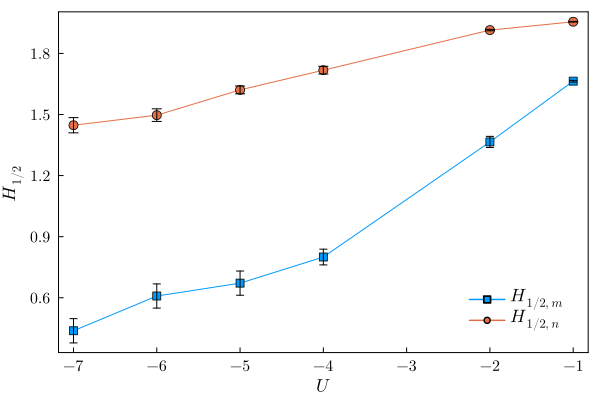

In [66]:
data = load("../../data/07_14_2023/H2_GS_N64_Lx8_Ly8_LA16_beta18.0.jld")

plot(
    data["U"], data["H2m_avg"], yerror=data["H2m_err"],
    marker=(4, :square),
    xlabel=L"U", ylabel=L"H_{1/2}",
    label=L"H_{1/2, m}",
    fontfamily="Computer Modern",
    legendfontsize = 12,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    data["U"], data["H2n_avg"], yerror=data["H2n_err"],
    marker=(5, :circle),
    label=L"H_{1/2, n}"
)

In [67]:
savefig("Shannon_ent_2.svg")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\plots\\07_14_2023\\Shannon_ent_2.svg"

In [68]:
data_1 = load("../../data/07_14_2023/P_GS_N64_Lx8_Ly8_LA16_beta18.0.jld")
data_2 = load("../../data/07_14_2023/P2_GS_N64_Lx8_Ly8_LA16_beta18.0.jld");

In [69]:
plt_Pn = []
for i in 1:6
    plt = plot(
        data_1["Pn_avg"][:,i], yerror=data_1["Pn_err"][:, i],
        marker=(4, :circle),
        ylim=(0,1),
        label=L"P_{n}", ylabel=L"P",
        fontfamily="Computer Modern",
        legendfontsize = 12,
        guidefontsize = 12,
        tickfontsize = 10,
        framestyle=:box, grid=:false,
        legend=:topleft,
        foreground_color_legend = nothing
    )

    plot!(
        plt,
        data_2["P2n_avg"][:,i], yerror=data_2["P2n_err"][:, i],
        label=L"P_{n,2}",
        marker=(4, :circle)
    )

    U = data_1["U"][i]
    annotate!(plt, 25, 0.5, text(L"U=%$U", 12))

    push!(plt_Pn, plt)
end

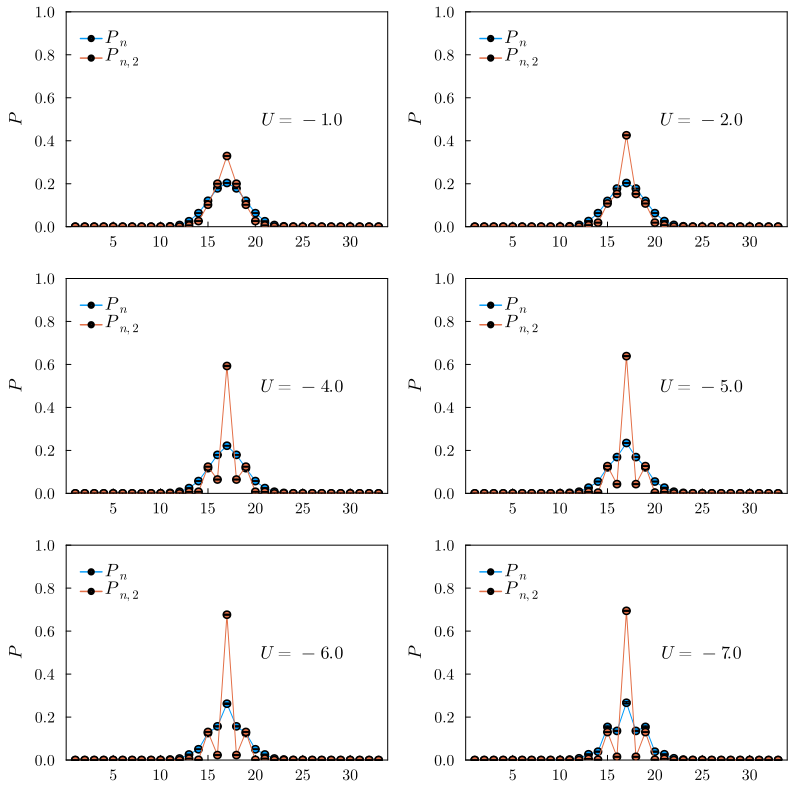

In [70]:
plot(plt_Pn[1], plt_Pn[2], plt_Pn[3], plt_Pn[4], plt_Pn[5] ,plt_Pn[6], layout=(3,2), size=(800, 800))

In [71]:
savefig("prob_dist_charge.svg")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\plots\\07_14_2023\\prob_dist_charge.svg"

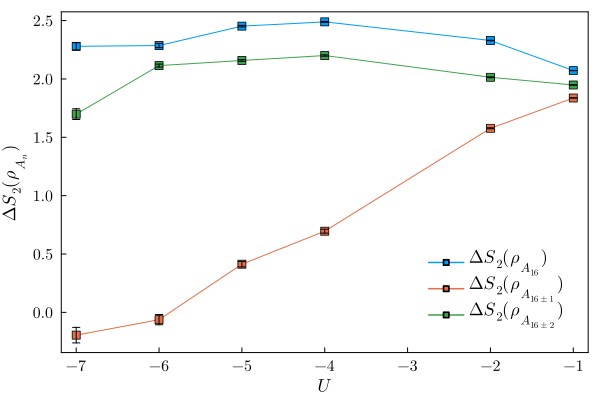

In [72]:
Pn_0 = measurement.(data_1["Pn_avg"][17, :],data_1["Pn_err"][17, :])
Pn2_0 = measurement.(data_2["P2n_avg"][17, :],data_2["P2n_err"][17, :])
ΔS_0 = log.(Pn2_0) - 2*log.(Pn_0)

Pn_pm1 = measurement.(data_1["Pn_avg"][18, :],data_1["Pn_err"][18, :])
Pn2_pm1 = measurement.(data_2["P2n_avg"][18, :],data_2["P2n_err"][18, :])
ΔS_pm1 = log.(Pn2_pm1) - 2*log.(Pn_pm1)

Pn_pm2 = measurement.(data_1["Pn_avg"][19, :],data_1["Pn_err"][19, :])
Pn2_pm2 = measurement.(data_2["P2n_avg"][19, :],data_2["P2n_err"][19, :])
ΔS_pm2 = log.(Pn2_pm2) - 2*log.(Pn_pm2)

plot(
    data_1["U"], ΔS_0,
    marker=(4, :square),
    xlabel=L"U", ylabel=L"\Delta S_2(\rho_{A_{n}})",
    label=L"\Delta S_2(\rho_{A_{16}})",
    fontfamily="Computer Modern",
    legendfontsize = 12,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    data_1["U"], ΔS_pm1,
    marker=(4, :square),
    label=L"\Delta S_2(\rho_{A_{16\pm 1}})"
)

plot!(
    data_1["U"], ΔS_pm2,
    marker=(4, :square),
    label=L"\Delta S_2(\rho_{A_{16\pm 2}})"
)

In [73]:
savefig("symm_resolved_ent_charge.svg")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\plots\\07_14_2023\\symm_resolved_ent_charge.svg"

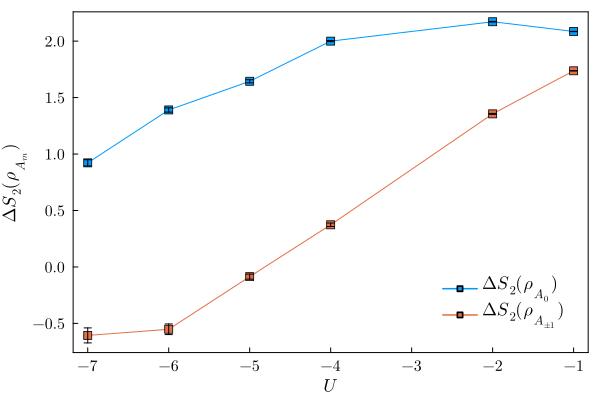

In [74]:
Pm_0 = measurement.(data_1["Pm_avg"][17, :],data_1["Pm_err"][17, :])
Pm2_0 = measurement.(data_2["P2m_avg"][17, :],data_2["P2m_err"][17, :])
ΔSm_0 = log.(Pm2_0) - 2*log.(Pm_0)

Pm_pm1 = measurement.(data_1["Pm_avg"][18, :],data_1["Pm_err"][18, :])
Pm2_pm1 = measurement.(data_2["P2m_avg"][18, :],data_2["P2m_err"][18, :])
ΔSm_pm1 = log.(Pm2_pm1) - 2*log.(Pm_pm1)

plot(
    data_1["U"], ΔSm_0,
    marker=(4, :square),
    xlabel=L"U", ylabel=L"\Delta S_2(\rho_{A_{m}})",
    label=L"\Delta S_2(\rho_{A_{0}})",
    fontfamily="Computer Modern",
    legendfontsize = 12,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    data_1["U"], ΔSm_pm1,
    marker=(4, :square),
    label=L"\Delta S_2(\rho_{A_{\pm 1}})"
)

In [75]:
savefig("symm_resolved_ent_spin.svg")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\plots\\07_14_2023\\symm_resolved_ent_spin.svg"